#### **Least Squares Regression line**

In this code we will explore how to create a basic lineal regression "manually", this is, without using any built in function in Python. I don't pretend to make this code more efficient or better by any means... I just want to do this exercise to better understand the underlying beautiful maths behind a linear regression. I won't even use a "mean" function, the idea is to do everything as manual as the code allows it.

The aim of a linear regression is to establish the potential correlation between a variable (or multiple variables) and a dependent variable. The line can be then used to predict values that are not in the initial dataset.

The method uses the **least squares method**, which basically aims to minimise the sum of the vertical distance between all of the data points and the line of best fit. This is kind of create the line that fits better the available data. 

To create this line we just need to estimate this simple linear equation:

$$
\hat{y} = a + b x
$$
where:<br>
- $\hat{y}$ is the predicted value of $y$
- $ a = \bar{y} - b \bar{x} $  
- $ b = \frac{S_{xy}}{S_{xx}} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2} = \frac{\sum (xy) - \frac{\sum x \sum y}{n}}{\sum (x^2) - \frac{(\sum x)^2}{n}} $  
- $ \bar{x} = \frac{\sum x}{n}, \quad \bar{y} = \frac{\sum y}{n}$

In [58]:
# Define the variables
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [-8, 3, 5, 15, 30, 1, 4, 99, 2, 50]

# Start off by working out the mean of the independent and dependent variables.
mean_X = sum(X) / len(X)
mean_y = sum(y) / len(y)

# Now calculate b (the slope of the regression line) with least squares method
numerator = sum((X[i] - mean_X) * (y[i] - mean_y) for i in range(len(X)))
denominator = sum((X[i] - mean_X) ** 2 for i in range(len(X)))
b = numerator / denominator

# Calculate a (the y-intercept of the regression line)
a = mean_y - b * mean_X

a (intercept): -10.666666666666664
b (slope): 5.593939393939394


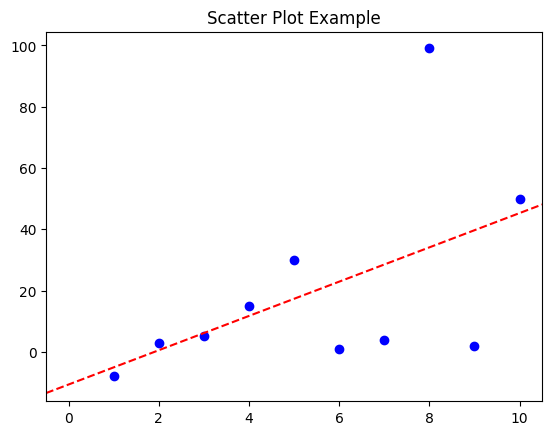

In [59]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X, y, color='blue', label='Data Points')
plt.title('Scatter Plot Example')

# Generate x-values for the line (min to max of X)
x_line = np.linspace(min(X), max(X), 100)
y_line = a + b * x_line  # Use the calculated slope and intercept on X

print(f"a (intercept): {a}")
print(f"b (slope): {b}")

# Plot the line. We specify the source (x=0, y=a=intercept, and the slope)
plt.axline(xy1=(0, a), slope=b, color='red', linestyle='--', label='Regression Line')
plt.show()